In [1]:
# Importing the necessary libraries first
import yfinance as yahooFinance
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
# Now we take google stocks data using the ticker symbol "GOOG"
googleStocks= yahooFinance.Ticker("GOOG")


In [3]:
# Getting 5years history of GOOG stock price movements; opening and closing prices
dataFrame1= googleStocks.history("5Y")


In [4]:
# We can't print all history of 5years here, so we just print the head(1st 5 rows)
print(dataFrame1.head())


                                Open       High        Low      Close  \
Date                                                                    
2019-06-06 00:00:00-04:00  52.249500  52.374500  51.685001  52.216999   
2019-06-07 00:00:00-04:00  52.531502  53.546001  52.419998  53.301998   
2019-06-10 00:00:00-04:00  53.648998  54.632999  53.616100  54.019001   
2019-06-11 00:00:00-04:00  54.699001  55.099499  53.880150  53.936001   
2019-06-12 00:00:00-04:00  53.900002  54.046501  53.376999  53.851501   

                             Volume  Dividends  Stock Splits  
Date                                                          
2019-06-06 00:00:00-04:00  34064000        0.0           0.0  
2019-06-07 00:00:00-04:00  36048000        0.0           0.0  
2019-06-10 00:00:00-04:00  29284000        0.0           0.0  
2019-06-11 00:00:00-04:00  28734000        0.0           0.0  
2019-06-12 00:00:00-04:00  21220000        0.0           0.0  


In [5]:
print(dataFrame1.tail())


                                 Open        High         Low       Close  \
Date                                                                        
2024-05-31 00:00:00-04:00  173.399994  174.419998  170.970001  173.960007   
2024-06-03 00:00:00-04:00  173.880005  175.860001  172.449997  174.419998   
2024-06-04 00:00:00-04:00  174.449997  175.190002  173.220001  175.130005   
2024-06-05 00:00:00-04:00  176.535004  177.970001  175.289993  177.070007   
2024-06-06 00:00:00-04:00  177.410004  178.710007  177.210007  178.149994   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-05-31 00:00:00-04:00  28085200        0.0           0.0  
2024-06-03 00:00:00-04:00  20742800        0.0           0.0  
2024-06-04 00:00:00-04:00  14066600        0.0           0.0  
2024-06-05 00:00:00-04:00  15233900        0.0           0.0  
2024-06-06 00:00:00-04:00  11423676        0.0           0.0  


In [6]:
# Know shape of the dataFrame
print(dataFrame1.shape)


(1260, 7)


In [7]:
# Shows we have 1260 rows with 7 columns


In [8]:
print(dataFrame1.describe()) # describe the dataFrame we have


              Open         High          Low        Close        Volume  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1.260000e+03   
mean    106.920568   108.156871   105.832312   107.025171  2.836871e+07   
std      31.195175    31.437557    30.932620    31.196657  1.242660e+07   
min      52.249500    52.374500    50.676800    52.216999  6.936000e+06   
25%      76.229252    77.781750    75.404190    76.042999  2.030138e+07   
50%     107.705002   109.330250   106.475002   108.267998  2.533740e+07   
75%     134.261253   135.825882   132.900501   134.360874  3.242378e+07   
max     178.779999   179.949997   177.309998   179.539993  9.779860e+07   

       Dividends  Stock Splits  
count     1260.0   1260.000000  
mean         0.0      0.015873  
std          0.0      0.563436  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0     20.000000  


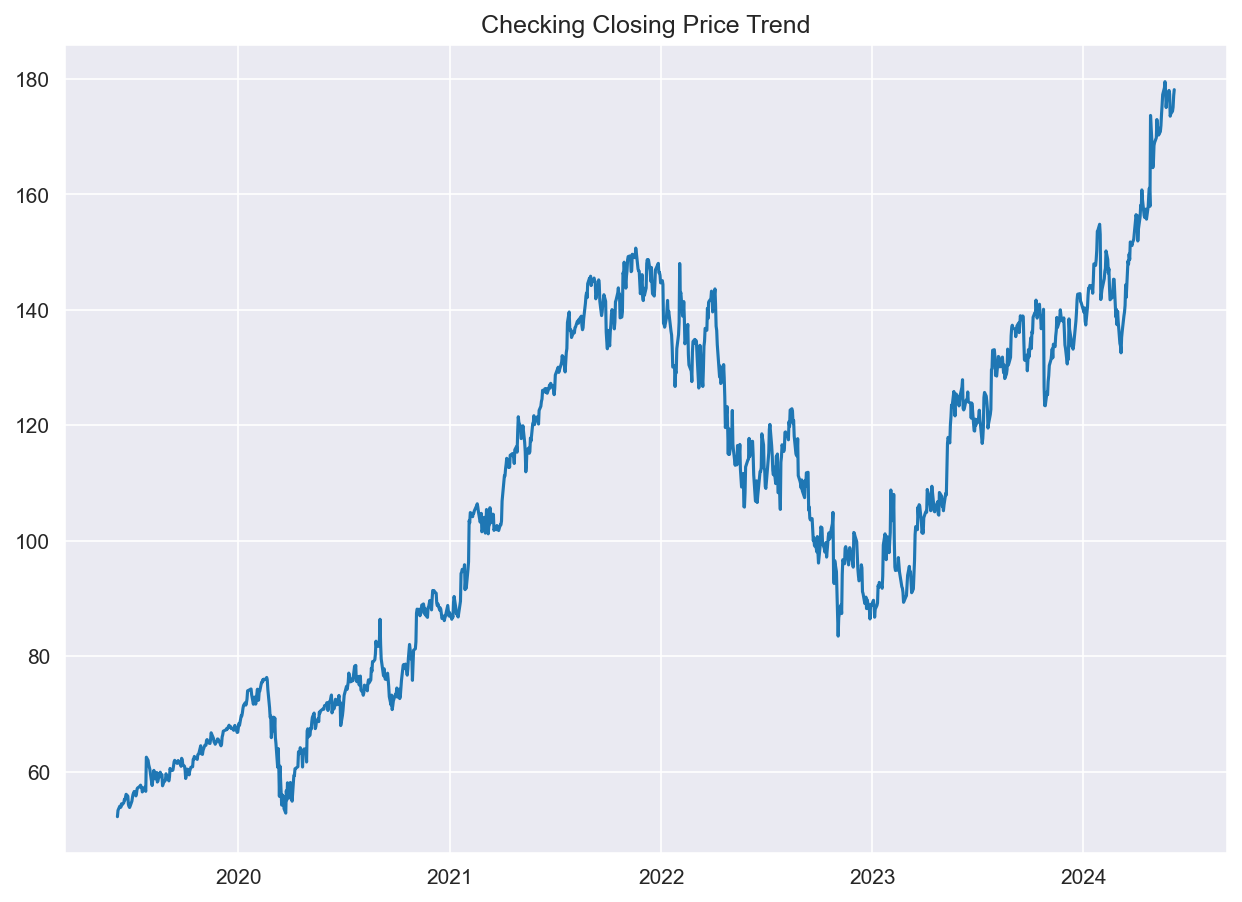

In [9]:
# Checking the overview of the closing price before calculating DMAs
sns.set_style('darkgrid')
plt.figure(figsize= (10,7), dpi=150)
plt.title("Checking Closing Price Trend")
plt.plot(dataFrame1["Close"])
plt.show()


In [10]:
# We now calculate the 50DMA(Day Moving Average)
dataFrame1["the50_DMA"]= dataFrame1["Close"].rolling(50).mean()


In [11]:
# Again, calculate the 200DMA(Day Moving Average)
dataFrame1["the200_DMA"]= dataFrame1["Close"].rolling(200).mean()


In [12]:
dataFrame1.describe()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,the50_DMA,the200_DMA
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.0,1260.000000,1211.000000,1061.000000
mean,106.920568,108.156871,105.832312,107.025171,2.836871e+07,0.0,0.015873,106.763970,107.120483
std,31.195175,31.437557,30.932620,31.196657,1.242660e+07,0.0,0.563436,29.090555,24.497173
min,52.249500,52.374500,50.676800,52.216999,6.936000e+06,0.0,0.000000,56.832240,63.270388
25%,76.229252,77.781750,75.404190,76.042999,2.030138e+07,0.0,0.000000,77.223835,86.776430
50%,107.705002,109.330250,106.475002,108.267998,2.533740e+07,0.0,0.000000,110.638000,109.883410
75%,134.261253,135.825882,132.900501,134.360874,3.242378e+07,0.0,0.000000,134.686300,129.252145
max,178.779999,179.949997,177.309998,179.539993,9.779860e+07,0.0,20.000000,166.393400,145.690400


In [13]:
# Dividends and Stock Splits are invalid, as they are 0.0 all rows. We now remove them

dataFrame1.drop(columns= ["Dividends", "Stock Splits"], inplace=True)


In [14]:
#print df head and df tail again
# head
print(dataFrame1.head())


                                Open       High        Low      Close  \
Date                                                                    
2019-06-06 00:00:00-04:00  52.249500  52.374500  51.685001  52.216999   
2019-06-07 00:00:00-04:00  52.531502  53.546001  52.419998  53.301998   
2019-06-10 00:00:00-04:00  53.648998  54.632999  53.616100  54.019001   
2019-06-11 00:00:00-04:00  54.699001  55.099499  53.880150  53.936001   
2019-06-12 00:00:00-04:00  53.900002  54.046501  53.376999  53.851501   

                             Volume  the50_DMA  the200_DMA  
Date                                                        
2019-06-06 00:00:00-04:00  34064000        NaN         NaN  
2019-06-07 00:00:00-04:00  36048000        NaN         NaN  
2019-06-10 00:00:00-04:00  29284000        NaN         NaN  
2019-06-11 00:00:00-04:00  28734000        NaN         NaN  
2019-06-12 00:00:00-04:00  21220000        NaN         NaN  


In [15]:
# for the first 7 in head, we get bull (NaN), because it's calculating Moving Averages


In [16]:
# tail
print(dataFrame1.tail())


                                 Open        High         Low       Close  \
Date                                                                        
2024-05-31 00:00:00-04:00  173.399994  174.419998  170.970001  173.960007   
2024-06-03 00:00:00-04:00  173.880005  175.860001  172.449997  174.419998   
2024-06-04 00:00:00-04:00  174.449997  175.190002  173.220001  175.130005   
2024-06-05 00:00:00-04:00  176.535004  177.970001  175.289993  177.070007   
2024-06-06 00:00:00-04:00  177.410004  178.710007  177.210007  178.149994   

                             Volume  the50_DMA  the200_DMA  
Date                                                        
2024-05-31 00:00:00-04:00  28085200   164.3652   144.74960  
2024-06-03 00:00:00-04:00  20742800   164.8788   144.97615  
2024-06-04 00:00:00-04:00  14066600   165.3460   145.19950  
2024-06-05 00:00:00-04:00  15233900   165.8644   145.44430  
2024-06-06 00:00:00-04:00  11423676   166.3934   145.69040  


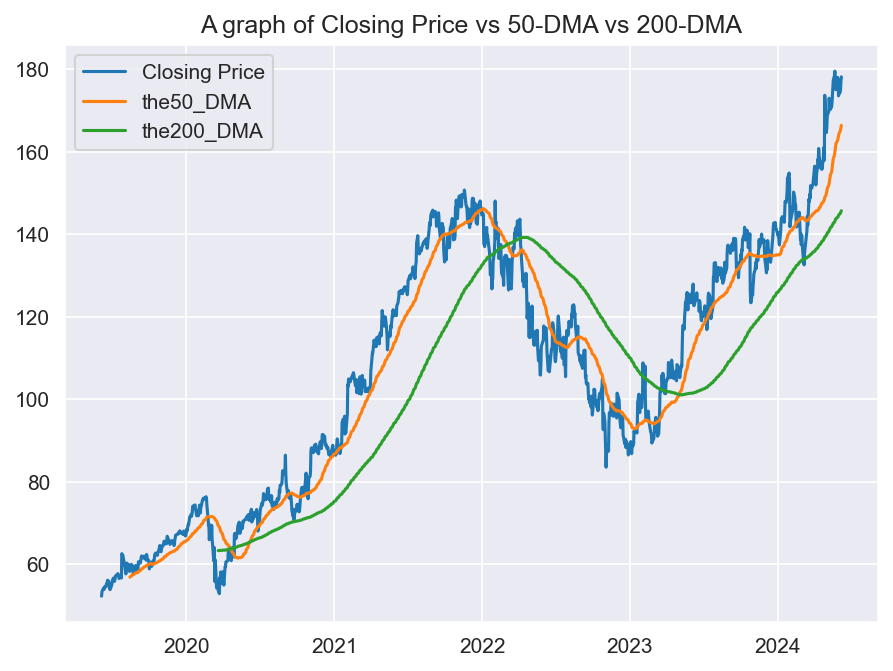

In [17]:
# Print closing Price vs the 50-DMA and the 200-DMA
sns.set_style("darkgrid")
plt.figure(figsize=(7,5), dpi=150)
plt.title("A graph of Closing Price vs 50-DMA vs 200-DMA")
plt.plot(dataFrame1["Close"], label="Closing Price")
plt.plot(dataFrame1["the50_DMA"], label="the50_DMA")
plt.plot(dataFrame1["the200_DMA"], label="the200_DMA")
plt.legend()


# Iferences drawn from the graph:
1. 50DMA and 200DMA are fairly good indicators of how the stock is moving.
2. If the closing price is above the 50DMA or 200DMA, it is usually on the uptrend or bullish.
3. If the closing price is below the 50DMA or 200DMA, it usually means that it is in a downward trend.
4. Every point where 50DMA and 200DMA intersect, the market usually reverses its trend (High -> Low | Low -> High).
5. The huge dip at 2020, indicates the Covid 19 market crash in the month of March .


# Finding the possible future movements of the Google Stock

In [18]:
# Here, you analyse the correlation between each variables


<Axes: >

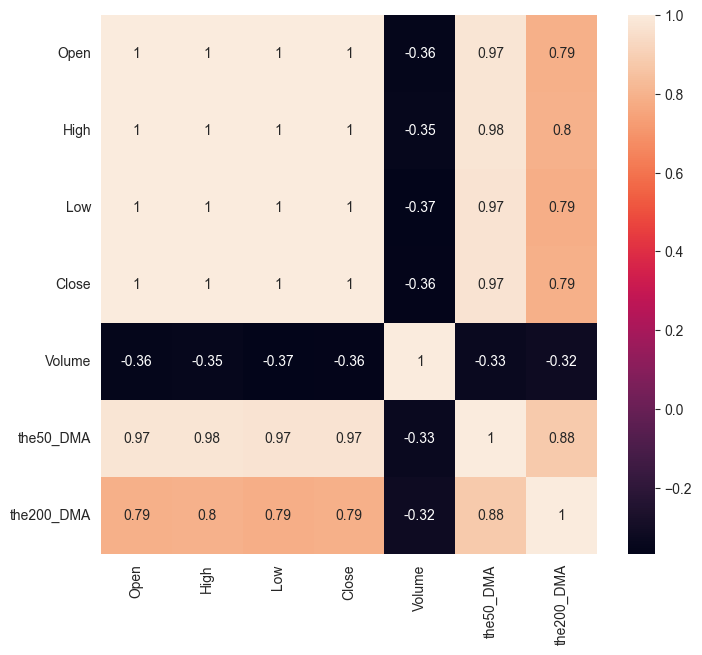

In [19]:
plt.figure(figsize=(8,7), dpi= 100)
sns.heatmap(dataFrame1.corr(), annot=True)
# seaborn's heatmap method plots the correlation in the heatmap, and the annot=True shows the numbers on the heatmap 


# Inferences from the heatmap
1. Closing price has very high correlation with almost all the variables except the volume
2. There is a strong multi-collinearity between the variables as well

In [20]:
# We now plot the displot of 50-DMA against the Closing Price


<Axes: title={'center': 'The Distplot of 50 DMA'}, xlabel='the50_DMA', ylabel='Density'>

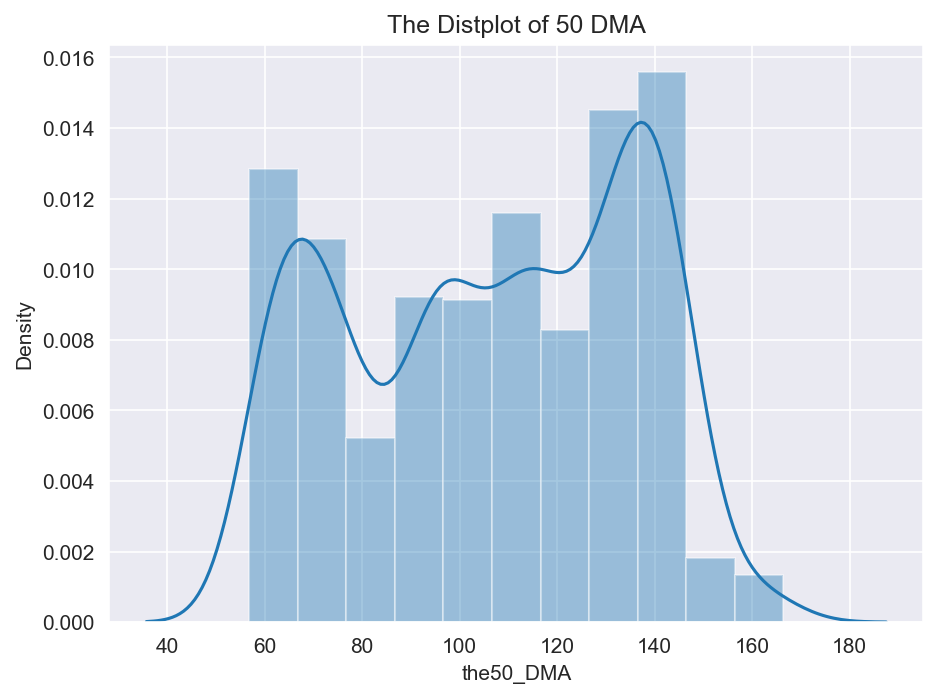

In [21]:
# We now plot the displot of 50-DMA
sns.set_style("darkgrid")
plt.figure(figsize=(7,5), dpi=150)
plt.title("The Distplot of 50 DMA")
sns.distplot(dataFrame1["the50_DMA"])


<Axes: title={'center': 'The Distplot of Closing Prices'}, xlabel='Close', ylabel='Density'>

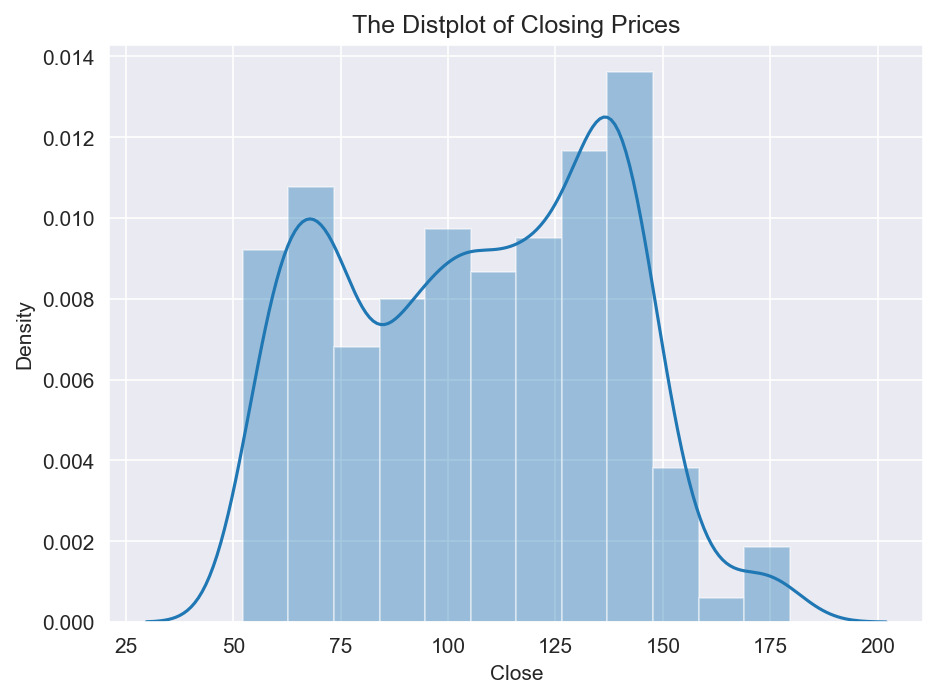

In [22]:
# Again Plot the DistPlot of the Closing Price
sns.set_style("darkgrid")
plt.figure(figsize=(7,5), dpi=150)
plt.title("The Distplot of Closing Prices")
sns.distplot(dataFrame1["Close"])


In [23]:
# Both 50DMA and Closing price graphs seem to be following the same distribution
# Now we try to fit the model


In [24]:
import statsmodels.formula.api as smf


In [25]:
model= smf.ols(formula= "Close ~ the50_DMA", data= dataFrame1) # we haven't used the 200-DMA becuse it had same distriubution as the 200-DMA..to avaoid multicollinearity.
model= model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 2.149e+04
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:59:12   Log-Likelihood:                -4065.0
No. Observations:                1211   AIC:                             8134.
Df Residuals:                    1209   BIC:                             8144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5632      0.760      2.057      0.040       0.072       3.054
the50_DMA      1.0068      0.007    146.611      0.000       0.993       1.020
==============================================================================
Omnibus:                       62.835   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.932
Skew:                          -0.562   Prob(JB):                     2.40e-16
Kurtosis:                       3.400   Cond. No.                         421.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# The above parameters might not be useful in real life, they are just for the model


# Inferences from the summary
1. Good r2 scores and coef (co-efficient)
2. Since they are very highly correlated, ~1, it isn't wise to fit the model based on the parameters in real life.

In [27]:
# we now plot the graph of closing price, the50_DMA, the200_DMA, and make our observations and inferences..the same we plotted earlier above


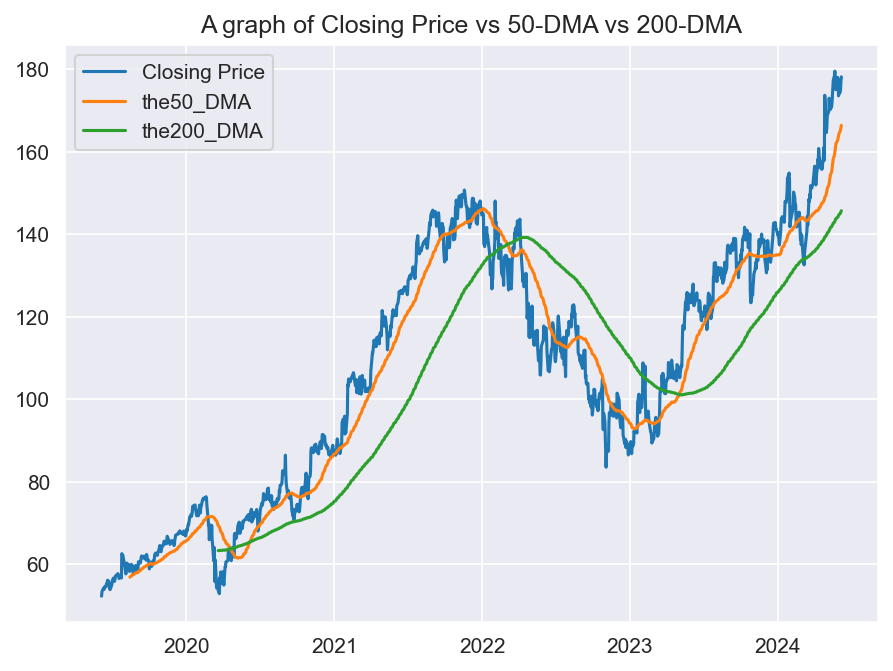

In [28]:
# Print closing Price vs the 50-DMA and the 200-DMA
sns.set_style("darkgrid")
plt.figure(figsize=(7,5), dpi=150)
plt.title("A graph of Closing Price vs 50-DMA vs 200-DMA")
plt.plot(dataFrame1["Close"], label="Closing Price")
plt.plot(dataFrame1["the50_DMA"], label="the50_DMA") 
plt.plot(dataFrame1["the200_DMA"], label="the200_DMA")
plt.legend()


# Observations and decision from the graph:
1. 50DMA and 200DMA are fairly good indicators of how the stock is moving.
2. If the closing price is above the 50DMA or 200DMA, it is usually on the uptrend or bullish.
3. If the closing price is below the 50DMA or 200DMA, it usually means that it is in a downward trend.
4. Every point where 50DMA and 200DMA intersect, the market usually reverses its trend (High -> Low | Low -> High).
5. The huge dip at 2020, indicates the Covid 19 market crash in the month of March .
6. From this graph, we can see that the price is above the50_DMA and the200_DMA, which means it'll keep going up
7. The the50_DMA and the200_DMA don't seem to be meeting anytime soon, so the price won't fall steeply incase it starts going down(bearish)